# Kreisdiagramm

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def create_pie_chart(data=None, frequency_table=None, title=None, frequency_type="absolute", colors=None, text_color="white"):
    """
    Erstellt ein Kreisdiagramm basierend auf den angegebenen textbasierten Daten oder einer Häufigkeitstabelle.
    Die Funktion kann entweder die absoluten oder die relativen Häufigkeiten (in Prozent) anzeigen.
    Optional kann eine Liste von Farben und eine Schriftfarbe für die Autotexte übergeben werden.

    Parameters
    ----------
    data : list, optional
        Eine Liste von textbasierten Werten (Kategorien), die im Kreisdiagramm dargestellt werden sollen.
        
    frequency_table : list of tuples, optional
        Eine Liste von Tupeln, wobei das erste Element die Kategorie (z.B. "apple") und das zweite Element 
        die Häufigkeit (z.B. 3) ist. Wenn diese übergeben wird, werden die Häufigkeiten nicht automatisch berechnet.

    title : str, optional
        Titel des Diagramms.

    frequency_type : str, optional
        "absolute" für absolute Häufigkeit, "relative" für relative Häufigkeit in Prozent.

    colors : list, optional
        Eine Liste von Farben, die für das Kreisdiagramm verwendet werden sollen. Wenn keine Farben angegeben werden,
        wird die Seaborn-Palette "crest" verwendet.

    text_color : str, optional
        Die Farbe des Textes (Autotexts) im Kreisdiagramm. Standard ist "white".

    Plot
    ----
    Ein matplotlib-Kreisdiagramm mit:
        - Einer Darstellung der Häufigkeiten der Kategorien.
        - Optionalen Labels, die die Häufigkeiten oder Prozente der einzelnen Kategorien anzeigen.

    Beispiele
    ---------
    >>> data = ["apple", "banana", "apple", "orange", "banana", "banana"]
    >>> create_pie_chart(data=data, title="Früchte", frequency_type="relative", colors=["#ff9999", "#66b3ff", "#99ff99", "#ffcc99"], text_color="black")
    
    >>> frequency_table = [("apple", 3), ("banana", 2), ("orange", 1)]
    >>> create_pie_chart(frequency_table=frequency_table, title="Häufigkeit der Früchte", frequency_type="absolute")
    """
    
    # Berechne die Häufigkeiten aus der Datenliste oder der übergebenen Häufigkeitstabelle
    if frequency_table is not None:
        categories, frequencies = zip(*frequency_table)
    elif data is not None:
        categories, frequencies = np.unique(data, return_counts=True)
    else:
        raise ValueError("Entweder \"data\" oder \"frequency_table\" muss übergeben werden.")
    
    # Berechne die relative Häufigkeit, wenn 'relative' gewählt ist
    if frequency_type == "relative":
        total = sum(frequencies)
        frequencies = [(freq / total) * 100 for freq in frequencies]

    # Verwende die übergebenen Farben oder die Standard-Seaborn-Palette
    if colors is None:
        sns.set_palette("hls")
        colors = sns.color_palette()

    fig, ax = plt.subplots(figsize=(8, 6))

    # Erstelle das Kreisdiagramm
    wedges, texts, autotexts = ax.pie(
        frequencies,
        labels=categories,
        autopct=lambda pct: f"{pct:.1f}%" if frequency_type == "relative" else f"{int(pct * total / 100)}",
        startangle=90,
        colors=colors,
        wedgeprops={'edgecolor': 'black'},
    )

    # Stilisiere die Autotexte (Häufigkeitswerte im Diagramm)
    for autotext in autotexts:
        autotext.set_color(text_color)  # Verwende die angegebene Textfarbe
        autotext.set_fontsize(12)

    # Füge eine Legende außerhalb des Kreisdiagramms in der oberen rechten Ecke hinzu
    ax.legend(wedges, categories, title="Kategorien", loc="upper right", bbox_to_anchor=(1.25, 1))

    # Setze den Titel des Diagramms
    ax.set_title(title if title else "Kreisdiagramm")

    plt.tight_layout()

## 1. Beispiel

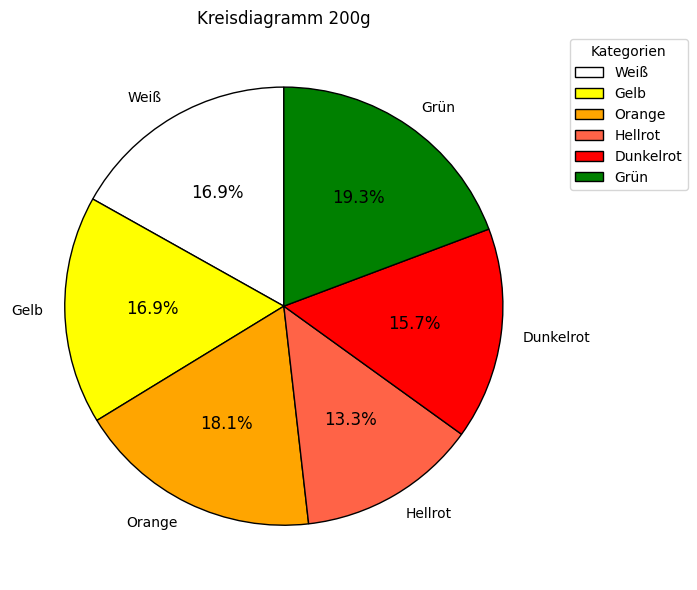

In [46]:
frequency_table = [('Weiß', 14), ('Gelb', 14), ('Orange', 15), ('Hellrot', 11), ('Dunkelrot', 13), ('Grün', 16)]
colors = ["White", "Yellow", "Orange", "tomato", "red", "Green"]
create_pie_chart(frequency_table=frequency_table, title="Kreisdiagramm 200g", frequency_type="relative", colors=colors, text_color="black")